In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [2]:
logfile = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_4bit.log"
logfile2 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_mixed_bit.log"
logfile3 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_2bit.log"
logfile4 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_70b_hqq_4bit.log"

In [3]:
logs = Path(logfile).read_text().split("\n")
logs2 = Path(logfile2).read_text().split("\n")
logs3 = Path(logfile3).read_text().split("\n")
logs4 = Path(logfile4).read_text().split("\n")

In [4]:
def extract_loss(l):
	match = re.search(r'Loss\s+([0-9.]+)', l)
	loss_value = match.group(1)
	return loss_value

In [5]:
losses = [float(extract_loss(l)) for l in logs if "Loss" in l][50:]
losses2 = [float(extract_loss(l)) for l in logs2 if "Loss" in l][50:]
losses3 = [float(extract_loss(l)) for l in logs3 if "Loss" in l][50:]
losses4 = [float(extract_loss(l)) for l in logs4 if "Loss" in l][50:]

<Axes: >

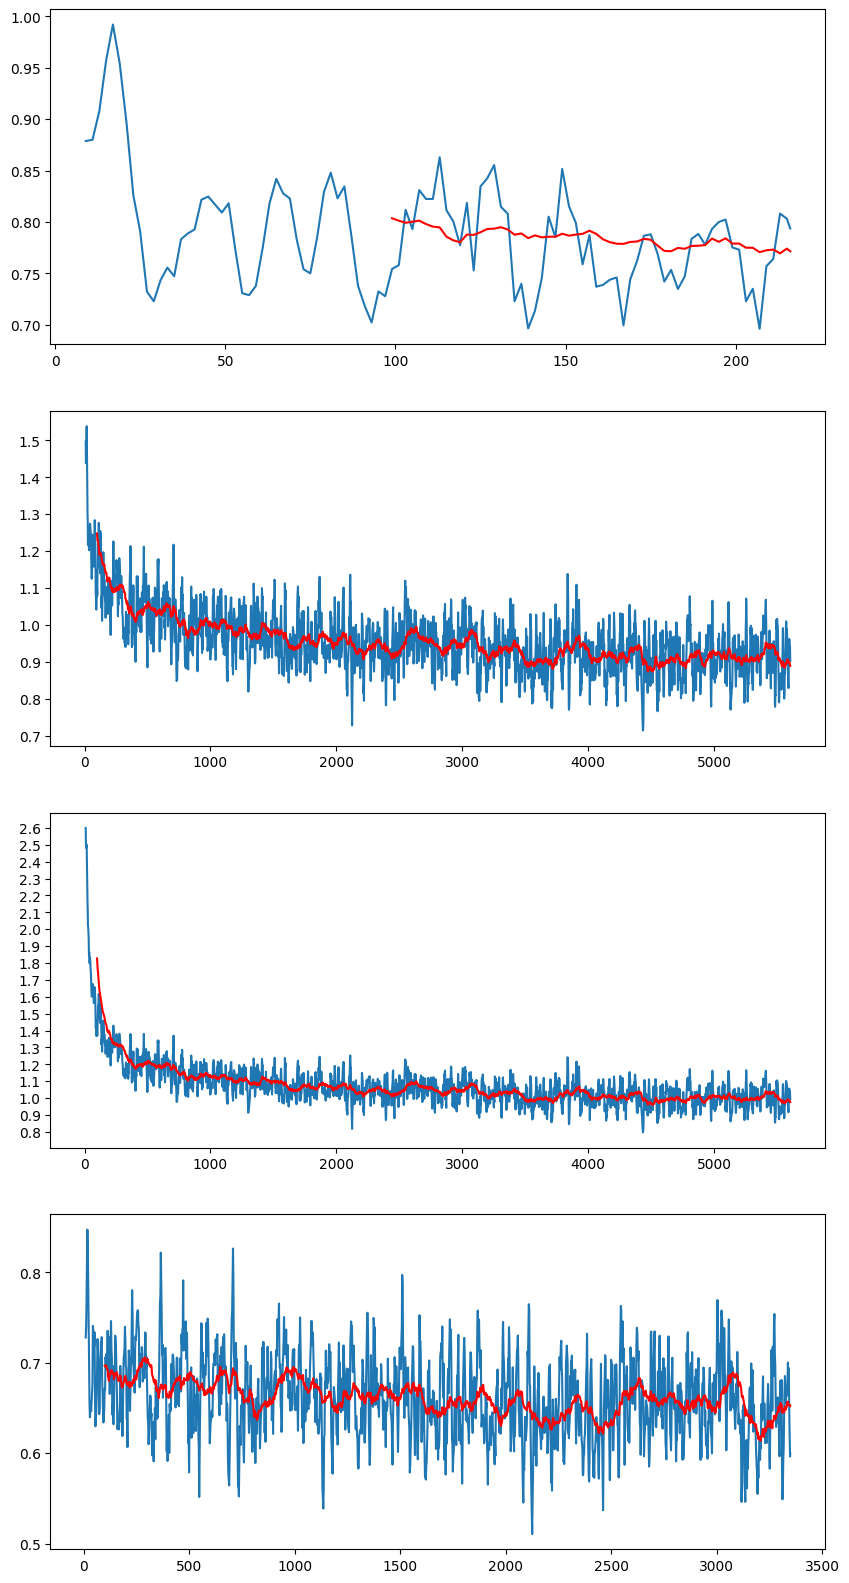

In [6]:
import matplotlib.pyplot as plt
# pd.Series(losses).plot()
# smooth the plot
# pd.Series(losses).rolling(100).mean().plot()
# smooth plot all logs in different figures
fix, axes = plt.subplots(4, 1, figsize=(10, 20))

# show 0,0.25,0.5,0.75,1,... in y axis
axes[0].yaxis.set_major_locator(plt.MultipleLocator(0.05))
axes[1].yaxis.set_major_locator(plt.MultipleLocator(0.1))
axes[2].yaxis.set_major_locator(plt.MultipleLocator(0.1))
axes[3].yaxis.set_major_locator(plt.MultipleLocator(0.1))

pd.Series(losses).rolling(10).mean().plot(ax=axes[0])
pd.Series(losses2).rolling(10).mean().plot(ax=axes[1])
pd.Series(losses3).rolling(10).mean().plot(ax=axes[2])
pd.Series(losses4).rolling(10).mean().plot(ax=axes[3])

# fit a red regression line
pd.Series(losses).rolling(100).mean().plot(ax=axes[0], color='red')
pd.Series(losses2).rolling(100).mean().plot(ax=axes[1], color='red')
pd.Series(losses3).rolling(100).mean().plot(ax=axes[2], color='red')
pd.Series(losses4).rolling(100).mean().plot(ax=axes[3], color='red')